In [60]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import color, img_as_ubyte, io
from skimage.feature import canny
from skimage.transform import hough_ellipse, resize
from skimage.draw import ellipse_perimeter
from skimage.filters import gaussian

# Load picture, convert to grayscale and detect edges
image_rgb = io.imread("source.PNG")[:,:,:3]
image_rgb = resize(image_rgb, (image_rgb.shape[0] * 0.5, image_rgb.shape[1] * 0.5), anti_aliasing = True)
image_gray = color.rgb2gray(image_rgb)
edges = gaussian(image_gray, sigma = 0.7)
edges = canny(edges, sigma=0.85, low_threshold=0.1, high_threshold=0.5)

io.imsave("canny.png", edges)

C:\Users\Shiru\AppData\Local\Temp/ipykernel_24644/4135597022.py:17: UserWarning: canny.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave("canny.png", edges)


In [44]:
print(edges.shape)

(98, 171)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Result:  [( 26,  2. , 28. ,  0.        , 27.01851217, 3.10457254)
 ( 26,  2. , 78. ,  0.        , 29.01723626, 3.10712355)
 ( 26,  2. , 78.5,  0.        , 29.51694429, 3.10770732) ...
 (199, 77.5, 82. , 83.08579903,  0.        , 1.79533988)
 (199, 77.5, 82.5, 83.5733211 ,  0.        , 1.79400775)
 (199, 78. , 82.5, 83.46406412,  0.        , 1.78816573)]


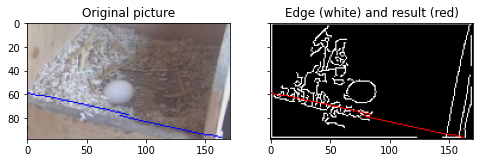

In [61]:
# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=5, threshold=25, min_size=15, max_size=30)
result.sort(order='accumulator')

print("Result: ", result)

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()

In [62]:
print(result.size)

501013
